In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with open('rkm_aggtest2.csv', newline='') as f:
    data = [row for row in csv.DictReader(f)] #read excel into a dictionary
with open('lj2010_cleaned.csv', newline='') as f:
    data2 = [row for row in csv.DictReader(f)] 
with open('lj2012_July.csv', newline='') as f:
    data3 = [row for row in csv.DictReader(f)] 
with open('lj2014_July.csv', newline='') as f:
    data4 = [row for row in csv.DictReader(f)] 
    
for x in data:
    x['rkm']  = float(x['rkm'])
    x['size'] = float(x['size'])
for x in data2:
    x['rkm']  = float(x['rkm'])
    x['size'] = float(x['size'])
for x in data3:
    x['rkm']  = float(x['rkm'])
    x['size'] = float(x['size'])
for x in data4:
    x['rkm']  = float(x['rkm'])
    x['size'] = float(x['size'])

In [2]:
#unique_types = list(set([x['type'] for x in data])) 
unique_types = ['a']
print('unique types are:',unique_types)

#Breaks list of dictionaries into a dictionary in which each
#key is a type of log jam and each value is a list of dictionaries
#specifying each log jam of that type
allsortedtypes = {}
for y in unique_types:
    allsortedtypes[y] = [x for x in data if x['type'] == y]
#print(allsortedtypes, "!!")

unique types are: ['a']


In [3]:
# filters all logjam sizes between start and end for a given lj type
def rkm_filter(ljtype, start, end, datal):
    return [x for x in datal if start<=x['rkm'] and x['rkm'] < end
             and x['type'] == ljtype]
# output is a list of dictionaries    

In [4]:
# sums up logjam size and counts logjams by river break sections & by type
spacing  = .5
breaks = np.arange(0,25.5,spacing)
test_type = 'a'

def type_section_aggregator(o_breaks, o_type, datax , spacing):
    o_location = []
    o_totalsize = []
    o_numberoflogjams = []
    for i in range(len(o_breaks)-1):
        p = rkm_filter(o_type ,o_breaks[i],o_breaks[i+1], datax)
        tot = 0
        for j in p:
            tot = tot + j.get('size')
        o_location.append(o_breaks[i+1]+spacing)
        o_totalsize.append(tot)
        o_numberoflogjams.append(len(p))
    return(o_type, o_location, o_totalsize, o_numberoflogjams)

bar_width = spacing/4

f = type_section_aggregator(breaks, test_type, data, 0)
f2010 = type_section_aggregator(breaks, test_type, data2, bar_width)
f2012 = type_section_aggregator(breaks, test_type, data3, 2*bar_width)
f2014 = type_section_aggregator(breaks, test_type, data4, 3*bar_width)
#print(breaks,f[1],f[2])


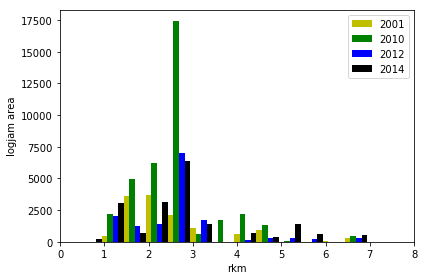

In [5]:
rects1 = plt.bar(f[1], f[2], bar_width,
                 color='y',
                 label='2001')

rects2 = plt.bar(f2010[1] , f2010[2], bar_width,
                 color='g',
                 label='2010')

rects3 = plt.bar(f2012[1] , f2012[2], bar_width,
                 color='b',
                 label='2012')

rects4 = plt.bar(f2014[1] , f2014[2], bar_width,
                 color='k',
                 label='2014')


plt.xlabel('rkm')
plt.ylabel('logjam area')
plt.xlim(0,8)
plt.title(' ')
#plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
breaks6 = [0,2.9, 7.4,9.2,12.1,15.3,21.1,24.8]
f6 = type_section_aggregator(breaks6, test_type, data, 0)
f6_2010 = type_section_aggregator(breaks6, test_type, data2, bar_width)
f6_2012 = type_section_aggregator(breaks6, test_type, data3, 2*bar_width)
f6_2014 = type_section_aggregator(breaks6, test_type, data4, 3*bar_width)
print(breaks6,f6[1],f6[2])


[0, 2.9, 7.4, 9.2, 12.1, 15.3, 21.1, 24.8] [2.9, 7.4, 9.2, 12.1, 15.3, 21.1, 24.8] [10916.779999999995, 1888.3400000000001, 0, 0, 0, 0, 0]


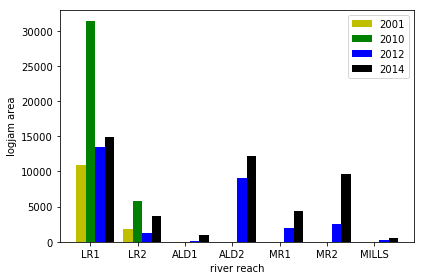

In [7]:
a = f6[2]
b = f6_2010[2]
c = f6_2012[2]
d =f6_2014[2]
e = ['LR1','LR2','ALD1', 'ALD2','MR1','MR2','MILLS']

y_pos = np.arange(7)
bw = .2

rects1 = plt.bar(y_pos, a, bw, color='y', label='2001')
rects2 = plt.bar(y_pos + bw, b, bw, color='g', label='2010')
rects3 = plt.bar(y_pos + 2*bw, c, bw, color='b', label='2012')
rects4 = plt.bar(y_pos + 3*bw, d, bw, color='k', label='2014')

plt.xticks(y_pos + bw, e, rotation = 0)
plt.legend()
plt.ylabel('logjam area')
plt.xlabel('river reach')
plt.tight_layout()
plt.show()

In [8]:
print(f[1])
print(np.arange(5, 8, .5)+.2)
print(f2012[1])


[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0]
[ 5.2  5.7  6.2  6.7  7.2  7.7]
[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.75, 6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75, 18.25, 18.75, 19.25, 19.75, 20.25, 20.75, 21.25, 21.75, 22.25, 22.75, 23.25, 23.75, 24.25, 24.75, 25.25]
